### Fetching Data

In [1]:
import os
import tarfile
import urllib

In [13]:
current_path=os.getcwd()
current_path

'C:\\Users\\Olan'

In [14]:
# makes tgz file to csv - Run only the first time
housing_tgz=tarfile.open('housing.tgz')
housing_tgz.extractall(path=current_path)
housing_tgz.close()

### EDA

In [2]:
import pandas as pd
df=pd.read_csv('housing.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [20]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [22]:
# observing the categorical variable - ocean_proximity
df['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

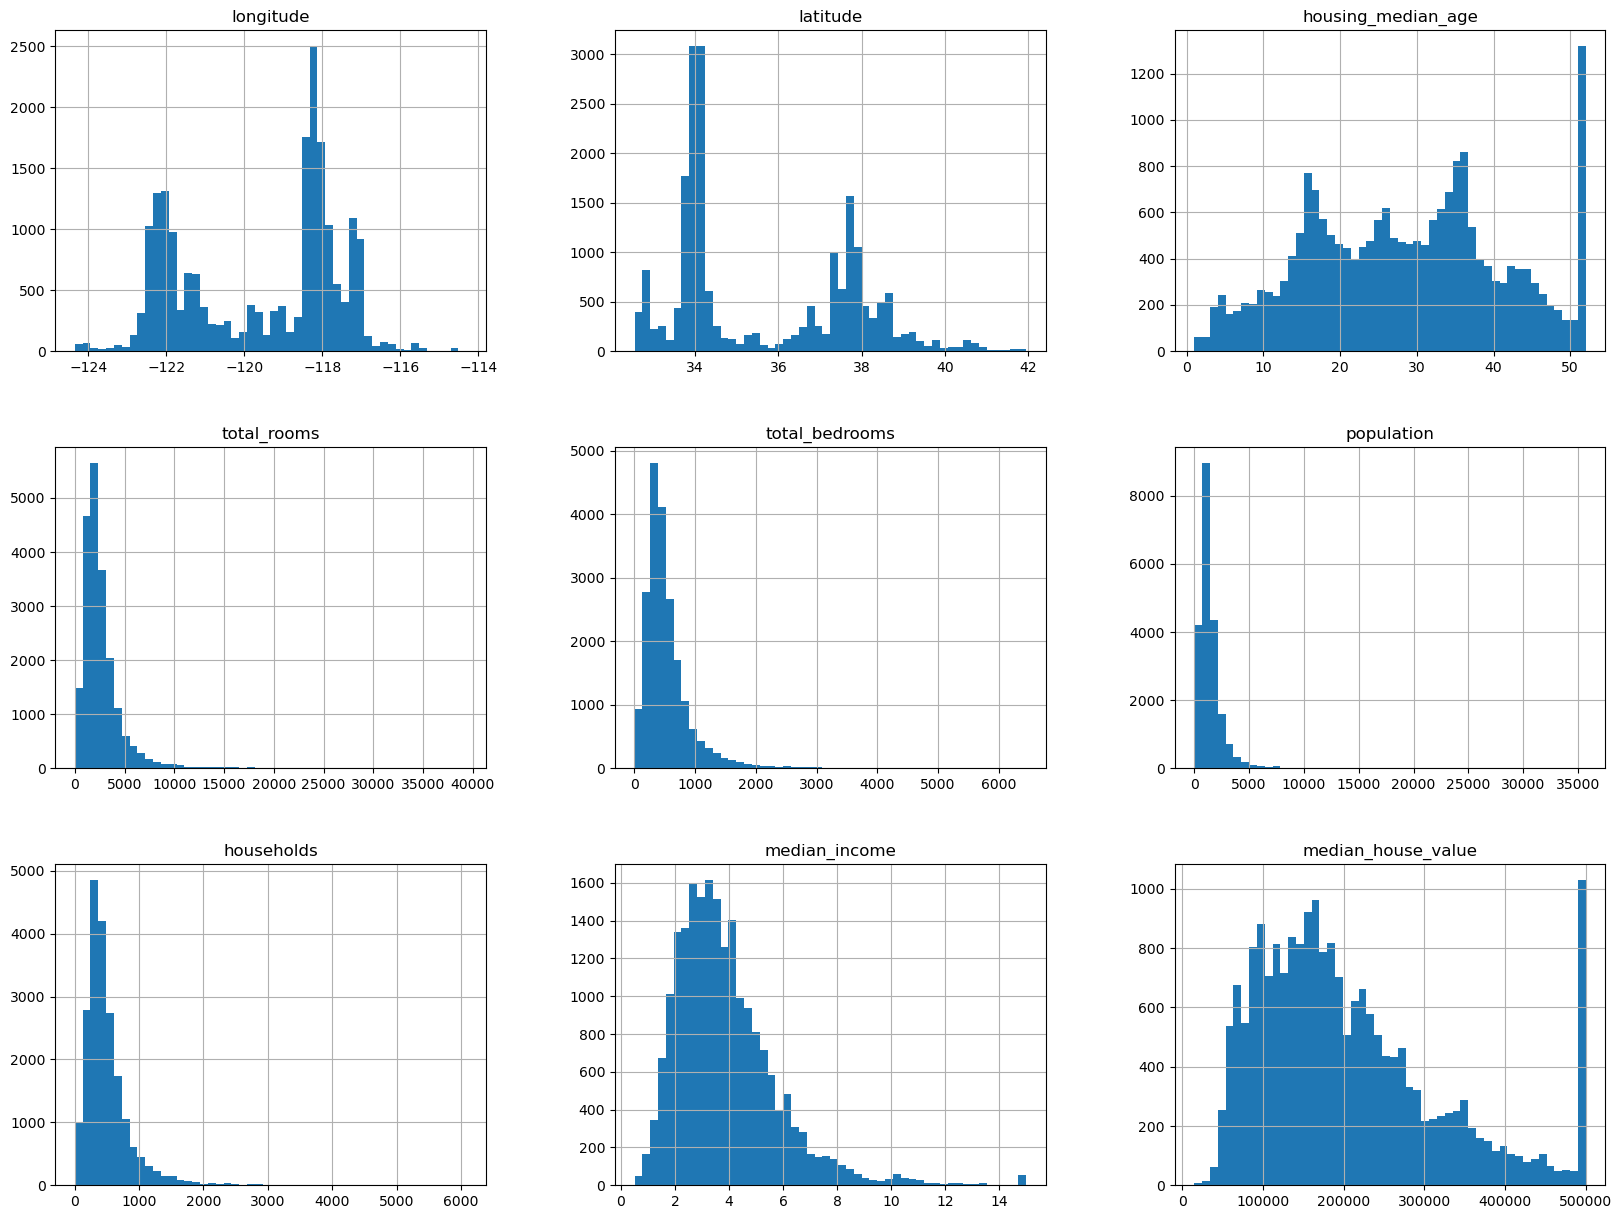

In [28]:
%matplotlib inline
import matplotlib.pyplot as plt
df.hist(bins=50,figsize=(20,15))

### Regression Methodology

In [25]:
# Features and label
X=df.drop('median_house_value',axis=1)
y=df['median_house_value']

### Null check

In [177]:
"""
Given a dataframe and column within the dataframe. Return "Yes" if the column contains a null value
Returns column and yes/no
"""
def get_col_with_nulls(df,col):
    is_there_a_null=df[col].isnull().any()
    if(is_there_a_null==False):
        return col,"No"
    else:
        return col,"Yes"
    

In [178]:
for column in df.columns:
    print(get_col_with_nulls(df,column))

('longitude', 'No')
('latitude', 'No')
('housing_median_age', 'No')
('total_rooms', 'No')
('total_bedrooms', 'Yes')
('population', 'No')
('households', 'No')
('median_income', 'No')
('median_house_value', 'No')
('ocean_proximity', 'No')


### Null imputing

In [85]:
#  NO NEED TO RUN THIS - PIPELINE IS IN PLACE
"""
Function to Impute any numerical col with an attribute of their choice, 
If nothing is provided, median is the default value I have chosen.
"""
from sklearn.impute import SimpleImputer
def impute_cols(df,col,attribute='mean'):
    try:
        imputer=SimpleImputer(strategy=attribute)
        col_to_impute=df[col].values.reshape(-1,1)
        df[col]=imputer.fit_transform(col_to_impute)
        return ("Imputed "+col+" with its "+attribute)
    except:
        return "Column : "+col+" is not numeric"
        
for column in df.columns:
    print(impute_cols(df,column))

Imputed longitude with its mean
Imputed latitude with its mean
Imputed housing_median_age with its mean
Imputed total_rooms with its mean
Imputed total_bedrooms with its mean
Imputed population with its mean
Imputed households with its mean
Imputed median_income with its mean
Column : ocean_proximity is not numeric


### Transforming Variables

In [69]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer

def feature_transformation(encode_df,categorical_attributes):
    num_attributes=encode_df.drop(categorical_attributes,axis=1).columns.to_list()
    
    numeric_pipeline=Pipeline([
        ('imputer',SimpleImputer(strategy='mean')),
        ('std_scaler',StandardScaler())
    ])


    encoder_pipeline=ColumnTransformer([
        ("numeric_var",numeric_pipeline,num_attributes),
        ("cat_var",OneHotEncoder(),categorical_attributes)
    ])
    df_encoded=encoder_pipeline.fit_transform(encode_df)
    return df_encoded,encoder_pipeline

In [59]:
# X_transformed=feature_transformation(X,categorical_attributes=['ocean_proximity'])

### Cross Validation

In [10]:
# from sklearn.model_selection import train_test_split

# X_train,X_val,y_train,y_val=train_test_split(X,y,test_size=0.2,random_state=42)

In [19]:
# print("Number of rows in my training set :",len(X_train))
# print("Number of rows in my validation set :",len(X_val))

In [28]:
from sklearn.model_selection import KFold, cross_val_score

kf= KFold(n_splits=5,shuffle=True,random_state=42)

In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(random_state=42)
}

NameError: name 'Ridge' is not defined

In [30]:
results = {}
for name, model in models.items():
    scores = cross_val_score(model, X_transformed, y, cv=kf, scoring='neg_mean_squared_error')
    results[name] = -scores.mean()

# Select the best model
best_model_name = min(results, key=results.get)
best_model = models[best_model_name]
print("Best Model:", best_model_name)

Best Model: Random Forest


### Hyperparameter Tuning

In [33]:
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV

rf_model = RandomForestRegressor()

# Define the hyperparameters distribution to sample from
param_dist = {
    'n_estimators': randint(50, 200),        # Number of trees in the forest
    'max_depth': [None] + list(range(10, 31)),  # Maximum depth of the tree
    'min_samples_split': randint(2, 11),      # Minimum number of samples required to split an internal node
    'min_samples_leaf': randint(1, 5)         # Minimum number of samples required to be at a leaf node
}

# Define RandomizedSearchCV with cross-validation
random_search = RandomizedSearchCV(estimator=rf_model, param_distributions=param_dist, n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)

# Perform randomized search to find the best hyperparameters
random_search.fit(X_transformed, y)

# Print the best hyperparameters and the corresponding mean cross-validated score
print("Best Hyperparameters:", random_search.best_params_)
print("Best Score (MSE):", -random_search.best_score_)

Best Hyperparameters: {'max_depth': 16, 'min_samples_leaf': 4, 'min_samples_split': 4, 'n_estimators': 199}
Best Score (MSE): 5878623052.532258


In [35]:
final_model=random_search.best_estimator_
final_model

RandomForestRegressor(max_depth=16, min_samples_leaf=4, min_samples_split=4,
                      n_estimators=199)

### Training

In [70]:
import pandas as pd
df=pd.read_csv('housing.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [71]:
features=df.drop('median_house_value',axis=1)
target=df['median_house_value']

In [72]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(features,target,test_size=0.2,random_state=42)

In [73]:
# pass the train and test features through all the transformation
X_train,encoder_pipeline=feature_transformation(X_train,categorical_attributes=['ocean_proximity'])
X_test=encoder_pipeline.transform(X_test)

In [74]:
final_model.fit(X_train,y_train)

RandomForestRegressor(max_depth=16, min_samples_leaf=4, min_samples_split=4,
                      n_estimators=199)

In [78]:
y_pred=final_model.predict(X_test)

### Regression Metrics

In [81]:
# How to infer rmse - On an average, the predicted target value is differing from the actual target value by the RMSE value

from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_percentage_error
import numpy as np
def regression_metrics(y_test,y_pred):
    r2score=r2_score(y_test,y_pred)
    rmse=np.sqrt(mean_squared_error(y_test,y_pred))
    mape=mean_absolute_percentage_error(y_test,y_pred)
    print("Testing r2 score is:",r2score)
    print("Testing rmse score is:",rmse)
    print("Testing mape score is:",mape)


In [82]:
regression_metrics(y_test,y_pred)

Testing r2 score is: 0.8148035847067162
Testing rmse score is: 49262.87094134378
Testing mape score is: 0.17882598271468486


### Classification Methodology

In [83]:
from sklearn.datasets import load_breast_cancer

In [102]:
data=load_breast_cancer()

In [103]:
df=pd.DataFrame(data.data,columns=data.feature_names)
df['target']=data.target
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [158]:
features=df.drop('target',axis=1)
target=df['target']

In [159]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(features,target,random_state=42,test_size=0.2)

In [160]:
from sklearn.linear_model import SGDClassifier
sgd=SGDClassifier(random_state=42,loss='log_loss')

### Exploring metrics

In [107]:
from sklearn.model_selection import cross_val_predict
y_pred=cross_val_predict(sgd,X_train,y_train,cv=5)

In [111]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train,y_pred)

array([[138,  31],
       [ 57, 229]], dtype=int64)

In [114]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

# cross validation metrics

print("Accuracy is :",round(accuracy_score(y_train,y_pred),2))
print("Precision is :",round(precision_score(y_train,y_pred),2))
print("Recall is :",round(recall_score(y_train,y_pred),2))
print("F1 score is :",round(f1_score(y_train,y_pred),2))

Accuracy is : 0.81
Precision is : 0.88
Recall is : 0.8
F1 score is : 0.84


In [127]:
# AUPR curve

In [161]:
sgd.fit(X_train,y_train)

SGDClassifier(loss='log_loss', random_state=42)

In [163]:
# predictions for the positive class
y_prob=sgd.predict_proba(X_test)[:,1]

# you could also do this if you are cross validating
# from sklearn.model_selection import cross_val_predict
# y_prob=cross_val_predict(sgd,X_train,y_train,cv=5,method='decision_function')

In [164]:
from sklearn.metrics import precision_recall_curve,precision_score,auc
# computes precision and recall across various thresholds
precision,recall,thresholds=precision_recall_curve(y_test,y_prob)

In [165]:
aupr=auc(recall,precision)

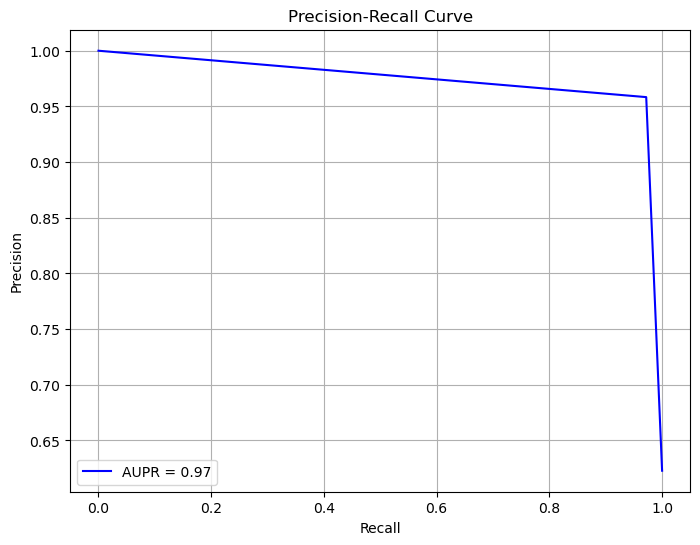

In [166]:
# Plot AUPR curve
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='b', label=f'AUPR = {aupr:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()

In [167]:
# AUC ROC curve - Plot between TPR(Recall) and FPR

# recall - tp/(tp+fn)
# fpr - fp/(fp+tn)

In [168]:
from sklearn.metrics import roc_curve
y_prob_sgd=sgd.predict_proba(X_test)[:,1]
fpr_sgd,tpr_sgd,threshold_sgd=roc_curve(y_test,y_prob_sgd)

In [170]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(random_state=42)
rf.fit(X_train,y_train)
y_prob_rf=rf.predict_proba(X_test)[:,1]
fpr_rf,tpr_rf,threshold_rf=roc_curve(y_test,y_prob_rf)

In [171]:
auc_roc_sgd=auc(fpr_sgd,tpr_sgd)
auc_roc_rf=auc(fpr_rf,tpr_rf)

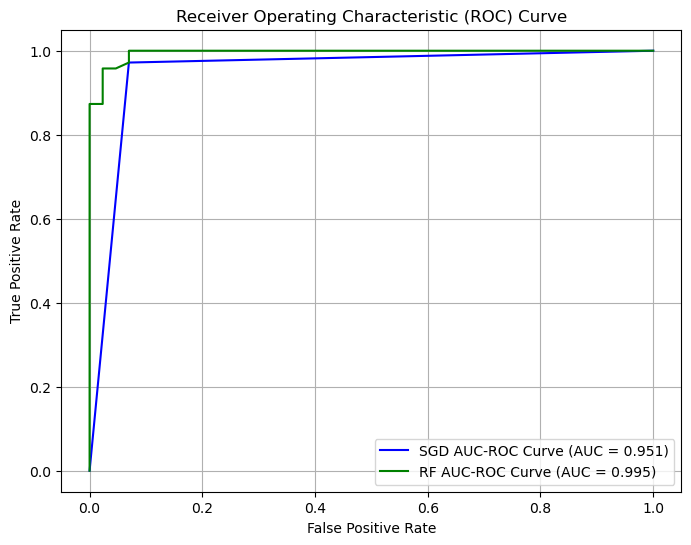

In [174]:
import matplotlib.pyplot as plt

# Plot both AUC-ROC curves for comparison
plt.figure(figsize=(8, 6))

# Plot SGD AUC-ROC curve
plt.plot(fpr_sgd, tpr_sgd, color='b', label=f'SGD AUC-ROC Curve (AUC = {auc_roc_sgd:.3f})')

# Plot Random Forest AUC-ROC curve
plt.plot(fpr_rf, tpr_rf, color='g', label=f'RF AUC-ROC Curve (AUC = {auc_roc_rf:.3f})')

# Add labels and legend
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.grid(True)
plt.show()


In [175]:
y_pred_sgd=sgd.predict(X_test)
print("Accuracy is :",round(accuracy_score(y_test,y_pred),2))
print("Precision is :",round(precision_score(y_test,y_pred),2))
print("Recall is :",round(recall_score(y_test,y_pred),2))
print("F1 score is :",round(f1_score(y_test,y_pred),2))

Accuracy is : 0.9
Precision is : 0.87
Recall is : 1.0
F1 score is : 0.93


In [176]:
y_pred_rf=rf.predict(X_test)
print("Accuracy is :",round(accuracy_score(y_test,y_pred_rf),2))
print("Precision is :",round(precision_score(y_test,y_pred_rf),2))
print("Recall is :",round(recall_score(y_test,y_pred_rf),2))
print("F1 score is :",round(f1_score(y_test,y_pred_rf),2))

Accuracy is : 0.96
Precision is : 0.96
Recall is : 0.99
F1 score is : 0.97
